In [1]:
from jitcdde import t
from parameters_insertion import *
import matplotlib.pyplot as plt
from msrDynamics.objects import Node, System
import pandas as pd

Instantiate System Object & Nodes

In [2]:
T0_c_f1 = F_to_K(1217)   # ORNL-1845 p. 80 
T0_c_f2 = F_to_K(1573)   # ORNL-1845 p. 80
T0_hfh_f1 = F_to_K(1573) # ORNL-1845 p. 80
T0_hfh_f2 = F_to_K(1217) # ORNL-1845 p. 80

# params = [-5.68629049e-05, -5.00000000e-05,  4.34964894e-05]
params = [-6.08617335e-05,  5.00000000e-05,  2.25540322e-05]
a_f, a_b, a_c = params

# ARE system        
ARE = System()

# CORE NODES
c_f1 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f1)
c_f2 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f2)
c_t1 = Node(m = m_t, scp = scp_t, y0 = T0_c_t1)
c_c1 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c1)
c_c2 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c2) 
c_m1 = Node(m = m_m_c, scp = scp_m, y0 = T0_c_m+50)
n = Node(y0 = n_frac0)
C1 = Node(y0 = C0[0])
C2 = Node(y0 = C0[1])
C3 = Node(y0 = C0[2])
C4 = Node(y0 = C0[3])
C5 = Node(y0 = C0[4])
C6 = Node(y0 = C0[5])
rho = Node(y0 = 0.00)

# add reactivity input
inserted = 4e-3
def rho_insert(t):
    if (t<t_ins):
        return 0.0
    elif (t<(t_ins+insert_duration)):
        return ((t-t_ins))*(inserted/insert_duration) # linear
    elif (t < t_wd):
        return inserted
    elif (t < t_wd+insert_duration):
        return inserted-((t-t_wd))*(inserted/insert_duration) # linear
    else:
        return 0.0

rho_ext = ARE.add_input(rho_insert, T)

# FUEL-HELIUM HX1
hx_fh1_f1 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f1)
hx_fh1_f2 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f2)
hx_fh1_t1 = Node(m = m_t_hxfh, scp = scp_t, y0 = T0_hfh_t1)
hx_fh1_h1 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h1)
hx_fh1_h2 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h2)

# FUEL-HELIUM HX2
hx_fh2_f1 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f1)
hx_fh2_f2 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f2)
hx_fh2_t1 = Node(m = m_t_hxfh, scp = scp_t, y0 = T0_hfh_t1)
hx_fh2_h1 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h1)
hx_fh2_h2 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h2)

# COOLANT-HELIUM HX1
hx_ch1_c1 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c1)
hx_ch1_c2 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c2)
hx_ch1_t1 = Node(m = m_t_hxch, scp = scp_t, y0 = T0_hch_t1)
hx_ch1_h1 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h1)
hx_ch1_h2 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h2)

# COOLANT-HELIUM HX2
hx_ch2_c1 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c1)
hx_ch2_c2 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c2)
hx_ch2_t1 = Node(m = m_t_hxch, scp = scp_t, y0 = T0_hfh_t1)
hx_ch2_h1 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h1)
hx_ch2_h2 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h2)

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h1)
hx_hwf1_h2 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h2)
hx_hwf1_t1 = Node(m = m_t_hxhwf, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwf1_w1 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w1)
hx_hwf1_w2 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w2)

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h1)
hx_hwf2_h2 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h2)
hx_hwf2_t1 = Node(m = m_t_hxhwf, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwf2_w1 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w1)
hx_hwf2_w2 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w2)

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h1)
hx_hwc1_h2 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h2)
hx_hwc1_t1 = Node(m = m_t_hxhwc, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwc1_w1 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w1)
hx_hwc1_w2 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w2)

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h1)
hx_hwc2_h2 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h2)
hx_hwc2_t1 = Node(m = m_t_hxhwc, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwc2_w1 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w1)
hx_hwc2_w2 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w2)



In [3]:


ARE.add_nodes([c_f1,c_f2,c_t1,c_c1,c_c2,c_m1,n,C1,C2,C3,C4,C5,C6,rho,
              hx_fh1_f1,hx_fh1_f2,hx_fh1_t1,hx_fh1_h1,hx_fh1_h2,
              hx_fh2_f1,hx_fh2_f2,hx_fh2_t1,hx_fh2_h1,hx_fh2_h2,
              hx_ch1_c1,hx_ch1_c2,hx_ch1_t1,hx_ch1_h1,hx_ch1_h2,
              hx_ch2_c1,hx_ch2_c2,hx_ch2_t1,hx_ch2_h1,hx_ch2_h2,
              hx_hwf1_h1,hx_hwf1_h2,hx_hwf1_t1,hx_hwf1_w1,hx_hwf1_w2,
              hx_hwf2_h1,hx_hwf2_h2,hx_hwf2_t1,hx_hwf2_w1,hx_hwf2_w2,
              hx_hwc1_h1,hx_hwc1_h2,hx_hwc1_t1,hx_hwc1_w1,hx_hwc1_w2,
              hx_hwc2_h1,hx_hwc2_h2,hx_hwc2_t1,hx_hwc2_w1,hx_hwc2_w2,
              ])

Define Dynamics

In [4]:
# CORE
c_f1.set_dTdt_advective(source = (hx_fh1_f2.y(t-tau_hx_c_f)+hx_fh2_f2.y(t-tau_hx_c_f))/2) 
c_f1.set_dTdt_internal(source = n.y(), k = k_f1*P)
c_f1.set_dTdt_convective(source = [c_t1.y()], hA = [hA_ft_c/2])

c_f2.set_dTdt_advective(source = c_f1.y()) 
c_f2.set_dTdt_internal(source = n.y(), k = k_f2*P)
c_f2.dTdt_convective = c_f1.dTdt_convective 

c_t1.set_dTdt_convective(source = [c_f1.y(), c_c1.y()], hA = [hA_ft_c,hA_tc_c])

c_c1.set_dTdt_advective(source = (hx_ch1_c2.y(t-tau_c_hx_f)+hx_ch2_c2.y(t-tau_c_hx_f))/2)
c_c1.set_dTdt_convective(source = [c_t1.y(),c_m1.y()], hA = [hA_tc_c/2,hA_mc_c/2])

c_c2.set_dTdt_advective(source = c_c1.y())
c_c2.dTdt_convective = c_c1.dTdt_convective

c_m1.set_dTdt_internal(source = n.y(), k = k_m*P)
c_m1.set_dTdt_convective(source = [c_c1.y()], hA = [hA_mc_c])

n.set_dndt(rho.y()+rho_ext, beta_t, Lam, lam, [C1.y(), C2.y(), C3.y(), C4.y(), C5.y(), C6.y()])
C1.set_dcdt(n.y(), beta[0], Lam, lam[0], tau_c, tau_l)
C2.set_dcdt(n.y(), beta[1], Lam, lam[1], tau_c, tau_l)
C3.set_dcdt(n.y(), beta[2], Lam, lam[2], tau_c, tau_l)
C4.set_dcdt(n.y(), beta[3], Lam, lam[3], tau_c, tau_l)
C5.set_dcdt(n.y(), beta[4], Lam, lam[4], tau_c, tau_l)
C6.set_dcdt(n.y(), beta[5], Lam, lam[5], tau_c, tau_l)
rho.set_drdt([c_f1.dydt(),c_f2.dydt(),c_m1.dydt(),c_c1.dydt(),c_c2.dydt()],[a_f/2,a_f/2,a_b,a_c/2,a_c/2])

# FUEL-HELIUM HX1
hx_fh1_f1.set_dTdt_advective(source = c_f2.y(t-tau_c_hx_f))
hx_fh1_f1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ft_hx/2])

hx_fh1_f2.set_dTdt_advective(source = hx_fh1_f1.y())
hx_fh1_f2.dTdt_convective = hx_fh1_f1.dTdt_convective

hx_fh1_t1.set_dTdt_convective(source = [hx_fh1_f1.y(),hx_fh1_h1.y()],hA = [hA_ft_hx,hA_ht_hx])

hx_fh1_h1.set_dTdt_advective(source = hx_hwf2_h2.y(t-tau_h))
hx_fh1_h1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ht_hx/2])

hx_fh1_h2.set_dTdt_advective(source = hx_fh1_h1.y())
hx_fh1_h2.dTdt_convective = hx_fh1_h1.dTdt_convective

# FUEL-HELIUM HX2
hx_fh2_f1.set_dTdt_advective(source = c_f2.y(t-tau_c_hx_f))
hx_fh2_f1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ft_hx/2])

hx_fh2_f2.set_dTdt_advective(source = hx_fh2_f1.y())
hx_fh2_f2.dTdt_convective = hx_fh2_f1.dTdt_convective

hx_fh2_t1.set_dTdt_convective(source = [hx_fh2_f1.y(),hx_fh2_h1.y()],hA = [hA_ft_hx,hA_ht_hx])

hx_fh2_h1.set_dTdt_advective(source = hx_hwf1_h2.y())
hx_fh2_h1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ht_hx/2])

hx_fh2_h2.set_dTdt_advective(source = hx_fh2_h1.y())
hx_fh2_h2.dTdt_convective = hx_fh2_h1.dTdt_convective

# COOLANT-HELIUM HX1
hx_ch1_c1.set_dTdt_advective(source = c_c2.y(t-tau_c_hx_f))
hx_ch1_c1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_ct_hx/2])

hx_ch1_c2.set_dTdt_advective(source = hx_ch1_c1.y())
hx_ch1_c2.dTdt_convective = hx_ch1_c1.dTdt_convective

hx_ch1_t1.set_dTdt_convective(source = [hx_ch1_c1.y(),hx_ch1_h1.y()],hA = [hA_ct_hx,hA_th_hxch])

hx_ch1_h1.set_dTdt_advective(source = hx_hwc1_h2.y(t-tau_h))
hx_ch1_h1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_th_hxch/2])

hx_ch1_h2.set_dTdt_advective(source = hx_ch1_h1.y())
hx_ch1_h2.dTdt_convective = hx_ch1_h1.dTdt_convective

# COOLANT-HELIUM HX2
hx_ch2_c1.set_dTdt_advective(source = c_c2.y(t-tau_c_hx_f))
hx_ch2_c1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_ct_hx/2])

hx_ch2_c2.set_dTdt_advective(source = hx_ch2_c1.y())
hx_ch2_c2.dTdt_convective = hx_ch2_c1.dTdt_convective

hx_ch2_t1.set_dTdt_convective(source = [hx_ch2_c1.y(),hx_ch2_h1.y()],hA = [hA_ct_hx,hA_th_hxch])

hx_ch2_h1.set_dTdt_advective(source = hx_hwc2_h2.y(t-tau_h))
hx_ch2_h1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_th_hxch/2])

hx_ch2_h2.set_dTdt_advective(source = hx_ch2_h1.y())
hx_ch2_h2.dTdt_convective = hx_ch2_h1.dTdt_convective

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1.set_dTdt_advective(source = hx_fh1_h2.y())
hx_hwf1_h1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf1_h2.set_dTdt_advective(source = hx_hwf1_h1.y())
hx_hwf1_h2.dTdt_convective = hx_hwf1_h1.dTdt_convective

hx_hwf1_t1.set_dTdt_convective(source = [hx_hwf1_h1.y(),hx_hwf1_w1.y()],hA = [hA_ht_hxhw,hA_tw_hxhw])

hx_hwf1_w1.set_dTdt_advective(source = T0_hhwf_w1)
hx_hwf1_w1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf1_w2.set_dTdt_advective(source = hx_hwf1_w1.y())
hx_hwf1_w2.dTdt_convective = hx_hwf1_w1.dTdt_convective

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1.set_dTdt_advective(source = hx_fh2_h2.y())
hx_hwf2_h1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf2_h2.set_dTdt_advective(source = hx_hwf2_h1.y())
hx_hwf2_h2.dTdt_convective = hx_hwf2_h1.dTdt_convective

hx_hwf2_t1.set_dTdt_convective(source = [hx_hwf2_h1.y(),hx_hwf2_w1.y()],hA = [hA_ht_hxhw,hA_tw_hxhw])

hx_hwf2_w1.set_dTdt_advective(source = T0_hhwf_w1)
hx_hwf2_w1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf2_w2.set_dTdt_advective(source = hx_hwf2_w1.y())
hx_hwf2_w2.dTdt_convective = hx_hwf2_w1.dTdt_convective

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1.set_dTdt_advective(source = hx_ch1_h2.y())
hx_hwc1_h1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_ht_hxhwc/2])

hx_hwc1_h2.set_dTdt_advective(source = hx_hwc1_h1.y())
hx_hwc1_h2.dTdt_convective = hx_hwc1_h1.dTdt_convective

hx_hwc1_t1.set_dTdt_convective(source = [hx_hwc1_h1.y(),hx_hwc1_w1.y()],hA = [hA_ht_hxhwc,hA_tw_hxhwc])

hx_hwc1_w1.set_dTdt_advective(source = T0_hhwc_w1)
hx_hwc1_w1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc1_w2.set_dTdt_advective(source = hx_hwc1_w1.y())
hx_hwc1_w2.dTdt_convective = hx_hwc1_w1.dTdt_convective

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1.set_dTdt_advective(source = hx_ch2_h2.y())
hx_hwc2_h1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_ht_hxhwc/2]) 

hx_hwc2_h2.set_dTdt_advective(source = hx_hwc2_h1.y())
hx_hwc2_h2.dTdt_convective = hx_hwc2_h1.dTdt_convective

hx_hwc2_t1.set_dTdt_convective(source = [hx_hwc2_h1.y(),hx_hwc2_w1.y()],hA = [hA_ht_hxhwc,hA_tw_hxhwc])

hx_hwc2_w1.set_dTdt_advective(source = T0_hhwc_w1)
hx_hwc2_w1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc2_w2.set_dTdt_advective(source = hx_hwc2_w1.y())
hx_hwc2_w2.dTdt_convective = hx_hwc2_w1.dTdt_convective


In [5]:
# solve system 
sol_jit = ARE.solve(T)

Generating, compiling, and loading C code.
Using default integration parameters.


/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did no

In [6]:
# unpack ORNL data 
df_power_reversed = pd.read_csv("./data/insertion.csv",header=None)
df_inlet_reversed = pd.read_csv("./data/fuel_inlet_temp.csv",header=None)
df_outlet_reversed = pd.read_csv("./data/fuel_outlet_temp.csv",header=None)
df_power = df_power_reversed.iloc[::-1] 
df_inlet = df_inlet_reversed.iloc[::-1]
df_outlet = df_outlet_reversed.iloc[::-1]
df_power = df_power.reset_index(drop=True)
df_inlet = df_inlet.reset_index(drop=True)
df_outlet = df_outlet.reset_index(drop=True)
df_inlet[1] = [F_to_K(t) for t in df_inlet[1]]
df_outlet[1] = [F_to_K(t) for t in df_outlet[1]]


# get indices for simulation data
t_before_data = (1110-df_inlet[0][0])*60
duration_data = (df_inlet.iloc[-1][0]-df_inlet[0][0])*60
t_end_data = df_inlet.iloc[-1][0]
t_before_sim = t_ins-t_before_data
T_insert = [t for t in T if (t > (t_before_sim)) and (t < (t_before_sim)+(duration_data))]
i_insert = [t[0] for t in enumerate(T) if (t[1] > (t_before_sim)) and (t[1] < (t_before_sim)+(duration_data))]
adj = (df_inlet[0][0])*60-T_insert[0]
df_outlet = df_outlet[:-2]

# adjust to reported initial values (graphical interpretaion correction)
dp = df_power[1][0]-2.34
df_power[1] = [p-dp for p in df_power[1]]

dt_fin = df_inlet[1][0]-F_to_K(1217)
df_inlet[1] = [tf-dt_fin for tf in df_inlet[1]]

dt_fout = df_outlet[1][0]-F_to_K(1573)
df_outlet[1] = [tf-dt_fout for tf in df_outlet[1]]

# avg temp
ornl_diff = [df_outlet[1][i]-df_inlet[1][i] for i in range(len(df_inlet))]
ornl_avg = sum(ornl_diff)/len(ornl_diff)

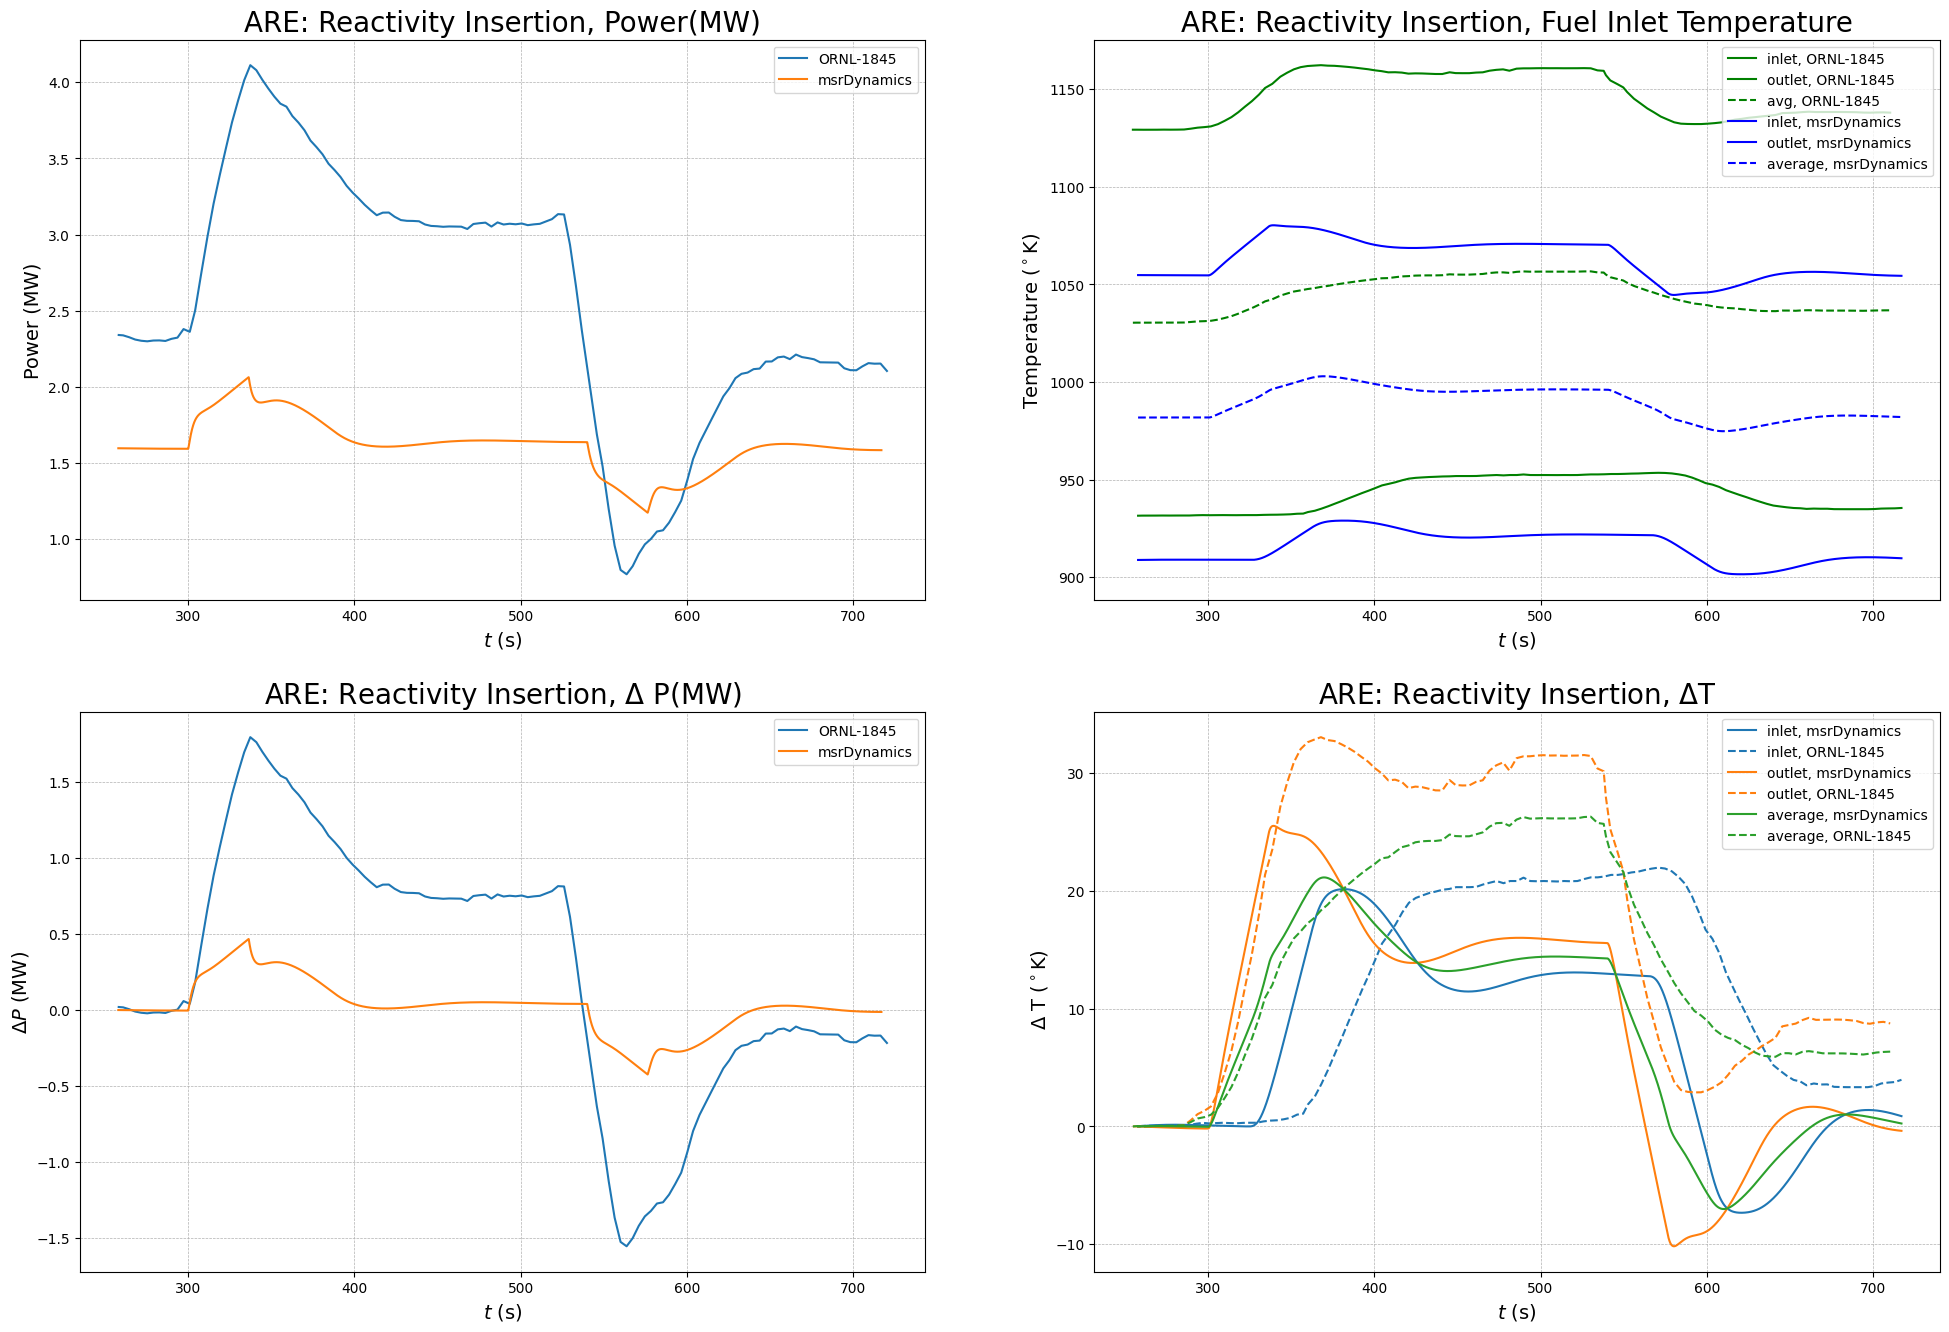

In [7]:
fig,axs = plt.subplots(2,2,figsize=(24,16))

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Function to update the style of each axis
def update_axis_style(ax, title = '', x_label='', y_label='', x_ticks=True, y_scale='linear'):
    ax.set_title(title,fontsize=20)
    ax.set_xlabel(x_label,fontsize=14)
    ax.set_ylabel(y_label,fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)
    ax.set_yscale(y_scale)

update_axis_style(axs[0,0],"ARE: Reactivity Insertion, Power(MW)")
axs[0,0].plot(df_power[0]*60-adj,df_power[1],label="ORNL-1845")
axs[0,0].plot(T_insert,[s*P for s in n.y_out[i_insert[0]:(i_insert[-1]+1)]],label="msrDynamics")
axs[0,0].set_xlabel(r"$t$ (s)")
axs[0,0].set_ylabel("Power (MW)")
axs[0,0].legend()

ornl_avg = (df_inlet[1]+df_outlet[1])/2
jitcdde_avg = (((np.array(hx_fh1_f2.y_out)+np.array(hx_fh1_f2.y_out))/2)+(np.array(c_f2.y_out)))/2
jit_inlet = (np.array(hx_fh1_f2.y_out)+np.array(hx_fh1_f2.y_out))/2

update_axis_style(axs[0,1],"ARE: Reactivity Insertion, Fuel Inlet Temperature")
axs[0,1].plot(df_inlet[0]*60-adj,df_inlet[1],label="inlet, ORNL-1845",color="green")
axs[0,1].plot(df_outlet[0]*60-adj,df_outlet[1],label="outlet, ORNL-1845",color="green")
axs[0,1].plot(df_outlet[0]*60-adj,ornl_avg,label="avg, ORNL-1845",color="green",linestyle="--")
axs[0,1].plot(T_insert,jit_inlet[i_insert[0]:(i_insert[-1]+1)],label="inlet, msrDynamics",color="blue")
axs[0,1].plot(T_insert,c_f2.y_out[i_insert[0]:(i_insert[-1]+1)],label="outlet, msrDynamics",color="blue")
axs[0,1].plot(T_insert,jitcdde_avg[i_insert[0]:(i_insert[-1]+1)],label="average, msrDynamics",color="blue",linestyle="--")
axs[0,1].set_xlabel(r"$t$ (s)")
axs[0,1].set_ylabel(r"Temperature ($^\circ$K)")
axs[0,1].legend()

# delta
update_axis_style(axs[1,0],r"ARE: Reactivity Insertion, $\Delta$ P(MW)")
axs[1,0].plot(df_power[0]*60-adj,df_power[1]-P,label="ORNL-1845")
axs[1,0].plot(T_insert,[P*(s-n.y_out[i_insert[0]-1]) for s in n.y_out[i_insert]],label="msrDynamics")
axs[1,0].set_xlabel(r"$t$ (s)")
axs[1,0].set_ylabel(r"$\Delta P$ (MW)")
axs[1,0].legend()

ornl_avg = (df_inlet[1]+df_outlet[1])/2
jitcdde_avg = (((np.array(hx_fh1_f2.y_out)+np.array(hx_fh1_f2.y_out))/2)+(np.array(c_f2.y_out)))/2
jit_inlet = (np.array(hx_fh1_f2.y_out)+np.array(hx_fh1_f2.y_out))/2

update_axis_style(axs[1,1],r"ARE: Reactivity Insertion, $\Delta$T")
axs[1,1].plot(T_insert,jit_inlet[i_insert]-jit_inlet[i_insert[0]-1],label="inlet, msrDynamics",color=colors[0])
axs[1,1].plot(df_inlet[0]*60-adj,df_inlet[1]-df_inlet[1][0],linestyle ="--",label="inlet, ORNL-1845 ",color=colors[0])
axs[1,1].plot(T_insert,c_f2.y_out[i_insert]-c_f2.y_out[i_insert[0]-1],label="outlet, msrDynamics",color=colors[1])
axs[1,1].plot(df_outlet[0]*60-adj,df_outlet[1]-df_outlet[1][0],linestyle="--",label="outlet, ORNL-1845 ",color=colors[1])
axs[1,1].plot(T_insert,jitcdde_avg[i_insert]-jitcdde_avg[i_insert[0]-1],label="average, msrDynamics",color=colors[2])
axs[1,1].plot(df_outlet[0]*60-adj,ornl_avg-ornl_avg[0],label="average, ORNL-1845",color=colors[2],linestyle="--")
axs[1,1].set_xlabel(r"$t$ (s)")
axs[1,1].set_ylabel(r" $\Delta$ T ($^\circ$K)")
axs[1,1].legend()

In [8]:
# power fraction as calculated from steady state
hx_hwf1 = 0.4054600395507873
hx_hwf2 = 0.40545967824513574
hx_hwc1 = 0.09454014110203846
hx_hwc2 = 0.09454014110203846

dT_lm_f = ((F_to_K(1450)-F_to_K(620))-(F_to_K(1150)-F_to_K(180)))/math.log((F_to_K(1450)-F_to_K(620))/(F_to_K(1150)-F_to_K(180)))
h_overall_f = P*(hx_hwf1+hx_hwf2)/dT_lm_f
hA_ft_hx = h_overall_f
hA_ht_hx = h_overall_f

dT_lm_c = ((F_to_K(1235)-F_to_K(1020))-(F_to_K(1105)-F_to_K(170)))/math.log((F_to_K(1235)-F_to_K(1020))/(F_to_K(1105)-F_to_K(170)))
h_overall_c = P*(hx_hwc1+hx_hwc2)/dT_lm_c
hA_ct_hx = h_overall_c
hA_th_hxch = h_overall_c

dT_lm_hf = ((F_to_K(620)-F_to_K(135))-(F_to_K(180)-F_to_K(70)))/math.log((F_to_K(620)-F_to_K(135))/(F_to_K(180)-F_to_K(70)))
h_overall_hf = P*(hx_hwf1+hx_hwf2)/dT_lm_hf
hA_ht_hxhw = h_overall_hf
hA_tw_hxhw = h_overall_hf

dT_lm_hc = ((F_to_K(1020)-F_to_K(100))-(F_to_K(170)-F_to_K(70)))/math.log((F_to_K(1020)-F_to_K(100))/(F_to_K(170)-F_to_K(70)))
h_overall_hc = P*(hx_hwc1+hx_hwc2)/dT_lm_hc
hA_ht_hxhwc = h_overall_hc
hA_tw_hxhwc = h_overall_hc

# CORE
c_f1.set_dTdt_advective(source = (hx_fh1_f2.y(t-tau_hx_c_f)+hx_fh2_f2.y(t-tau_hx_c_f))/2) 
c_f1.set_dTdt_internal(source = n.y(), k = k_f1*P)
c_f1.set_dTdt_convective(source = [c_t1.y()], hA = [hA_ft_c/2])

c_f2.set_dTdt_advective(source = c_f1.y()) 
c_f2.set_dTdt_internal(source = n.y(), k = k_f2*P)
c_f2.dTdt_convective = c_f1.dTdt_convective 

c_t1.set_dTdt_convective(source = [c_f1.y(), c_c1.y()], hA = [hA_ft_c,hA_tc_c])

c_c1.set_dTdt_advective(source = (hx_ch1_c2.y(t-tau_c_hx_f)+hx_ch2_c2.y(t-tau_c_hx_f))/2)
c_c1.set_dTdt_convective(source = [c_t1.y(),c_m1.y()], hA = [hA_tc_c/2,hA_mc_c/2])

c_c2.set_dTdt_advective(source = c_c1.y())
c_c2.dTdt_convective = c_c1.dTdt_convective

c_m1.set_dTdt_internal(source = n.y(), k = k_m*P)
c_m1.set_dTdt_convective(source = [c_c1.y()], hA = [hA_mc_c])

n.set_dndt(rho.y()+rho_ext, beta_t, Lam, lam, [C1.y(), C2.y(), C3.y(), C4.y(), C5.y(), C6.y()])
C1.set_dcdt(n.y(), beta[0], Lam, lam[0], tau_c, tau_l)
C2.set_dcdt(n.y(), beta[1], Lam, lam[1], tau_c, tau_l)
C3.set_dcdt(n.y(), beta[2], Lam, lam[2], tau_c, tau_l)
C4.set_dcdt(n.y(), beta[3], Lam, lam[3], tau_c, tau_l)
C5.set_dcdt(n.y(), beta[4], Lam, lam[4], tau_c, tau_l)
C6.set_dcdt(n.y(), beta[5], Lam, lam[5], tau_c, tau_l)
rho.set_drdt([c_f1.dydt(),c_f2.dydt(),c_m1.dydt(),c_c1.dydt(),c_c2.dydt()],[a_f/2,a_f/2,a_b,a_c/2,a_c/2])

# FUEL-HELIUM HX1
hx_fh1_f1.set_dTdt_advective(source = c_f2.y(t-tau_c_hx_f))
hx_fh1_f1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ft_hx/2])

hx_fh1_f2.set_dTdt_advective(source = hx_fh1_f1.y())
hx_fh1_f2.dTdt_convective = hx_fh1_f1.dTdt_convective

hx_fh1_t1.set_dTdt_convective(source = [hx_fh1_f1.y(),hx_fh1_h1.y()],hA = [hA_ft_hx,hA_ht_hx])

hx_fh1_h1.set_dTdt_advective(source = hx_hwf2_h2.y(t-tau_h))
hx_fh1_h1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ht_hx/2])

hx_fh1_h2.set_dTdt_advective(source = hx_fh1_h1.y())
hx_fh1_h2.dTdt_convective = hx_fh1_h1.dTdt_convective

# FUEL-HELIUM HX2
hx_fh2_f1.set_dTdt_advective(source = c_f2.y(t-tau_c_hx_f))
hx_fh2_f1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ft_hx/2])

hx_fh2_f2.set_dTdt_advective(source = hx_fh2_f1.y())
hx_fh2_f2.dTdt_convective = hx_fh2_f1.dTdt_convective

hx_fh2_t1.set_dTdt_convective(source = [hx_fh2_f1.y(),hx_fh2_h1.y()],hA = [hA_ft_hx,hA_ht_hx])

hx_fh2_h1.set_dTdt_advective(source = hx_hwf1_h2.y())
hx_fh2_h1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ht_hx/2])

hx_fh2_h2.set_dTdt_advective(source = hx_fh2_h1.y())
hx_fh2_h2.dTdt_convective = hx_fh2_h1.dTdt_convective

# COOLANT-HELIUM HX1
hx_ch1_c1.set_dTdt_advective(source = c_c2.y(t-tau_c_hx_f))
hx_ch1_c1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_ct_hx/2])

hx_ch1_c2.set_dTdt_advective(source = hx_ch1_c1.y())
hx_ch1_c2.dTdt_convective = hx_ch1_c1.dTdt_convective

hx_ch1_t1.set_dTdt_convective(source = [hx_ch1_c1.y(),hx_ch1_h1.y()],hA = [hA_ct_hx,hA_th_hxch])

hx_ch1_h1.set_dTdt_advective(source = hx_hwc1_h2.y(t-tau_h))
hx_ch1_h1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_th_hxch/2])

hx_ch1_h2.set_dTdt_advective(source = hx_ch1_h1.y())
hx_ch1_h2.dTdt_convective = hx_ch1_h1.dTdt_convective

# COOLANT-HELIUM HX2
hx_ch2_c1.set_dTdt_advective(source = c_c2.y(t-tau_c_hx_f))
hx_ch2_c1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_ct_hx/2])

hx_ch2_c2.set_dTdt_advective(source = hx_ch2_c1.y())
hx_ch2_c2.dTdt_convective = hx_ch2_c1.dTdt_convective

hx_ch2_t1.set_dTdt_convective(source = [hx_ch2_c1.y(),hx_ch2_h1.y()],hA = [hA_ct_hx,hA_th_hxch])

hx_ch2_h1.set_dTdt_advective(source = hx_hwc2_h2.y(t-tau_h))
hx_ch2_h1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_th_hxch/2])

hx_ch2_h2.set_dTdt_advective(source = hx_ch2_h1.y())
hx_ch2_h2.dTdt_convective = hx_ch2_h1.dTdt_convective

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1.set_dTdt_advective(source = hx_fh1_h2.y())
hx_hwf1_h1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf1_h2.set_dTdt_advective(source = hx_hwf1_h1.y())
hx_hwf1_h2.dTdt_convective = hx_hwf1_h1.dTdt_convective

hx_hwf1_t1.set_dTdt_convective(source = [hx_hwf1_h1.y(),hx_hwf1_w1.y()],hA = [hA_ht_hxhw,hA_tw_hxhw])

hx_hwf1_w1.set_dTdt_advective(source = T0_hhwf_w1)
hx_hwf1_w1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf1_w2.set_dTdt_advective(source = hx_hwf1_w1.y())
hx_hwf1_w2.dTdt_convective = hx_hwf1_w1.dTdt_convective

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1.set_dTdt_advective(source = hx_fh2_h2.y())
hx_hwf2_h1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf2_h2.set_dTdt_advective(source = hx_hwf2_h1.y())
hx_hwf2_h2.dTdt_convective = hx_hwf2_h1.dTdt_convective

hx_hwf2_t1.set_dTdt_convective(source = [hx_hwf2_h1.y(),hx_hwf2_w1.y()],hA = [hA_ht_hxhw,hA_tw_hxhw])

hx_hwf2_w1.set_dTdt_advective(source = T0_hhwf_w1)
hx_hwf2_w1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf2_w2.set_dTdt_advective(source = hx_hwf2_w1.y())
hx_hwf2_w2.dTdt_convective = hx_hwf2_w1.dTdt_convective

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1.set_dTdt_advective(source = hx_ch1_h2.y())
hx_hwc1_h1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_ht_hxhwc/2])

hx_hwc1_h2.set_dTdt_advective(source = hx_hwc1_h1.y())
hx_hwc1_h2.dTdt_convective = hx_hwc1_h1.dTdt_convective

hx_hwc1_t1.set_dTdt_convective(source = [hx_hwc1_h1.y(),hx_hwc1_w1.y()],hA = [hA_ht_hxhwc,hA_tw_hxhwc])

hx_hwc1_w1.set_dTdt_advective(source = T0_hhwc_w1)
hx_hwc1_w1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc1_w2.set_dTdt_advective(source = hx_hwc1_w1.y())
hx_hwc1_w2.dTdt_convective = hx_hwc1_w1.dTdt_convective

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1.set_dTdt_advective(source = hx_ch2_h2.y())
hx_hwc2_h1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_ht_hxhwc/2]) 

hx_hwc2_h2.set_dTdt_advective(source = hx_hwc2_h1.y())
hx_hwc2_h2.dTdt_convective = hx_hwc2_h1.dTdt_convective

hx_hwc2_t1.set_dTdt_convective(source = [hx_hwc2_h1.y(),hx_hwc2_w1.y()],hA = [hA_ht_hxhwc,hA_tw_hxhwc])

hx_hwc2_w1.set_dTdt_advective(source = T0_hhwc_w1)
hx_hwc2_w1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc2_w2.set_dTdt_advective(source = hx_hwc2_w1.y())
hx_hwc2_w2.dTdt_convective = hx_hwc2_w1.dTdt_convective



In [9]:
# solve system 
sol_jit = ARE.solve(T)

Generating, compiling, and loading C code.
Using default integration parameters.


/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")


In [10]:
P*n.y_out[-1]

2.6092508389559628

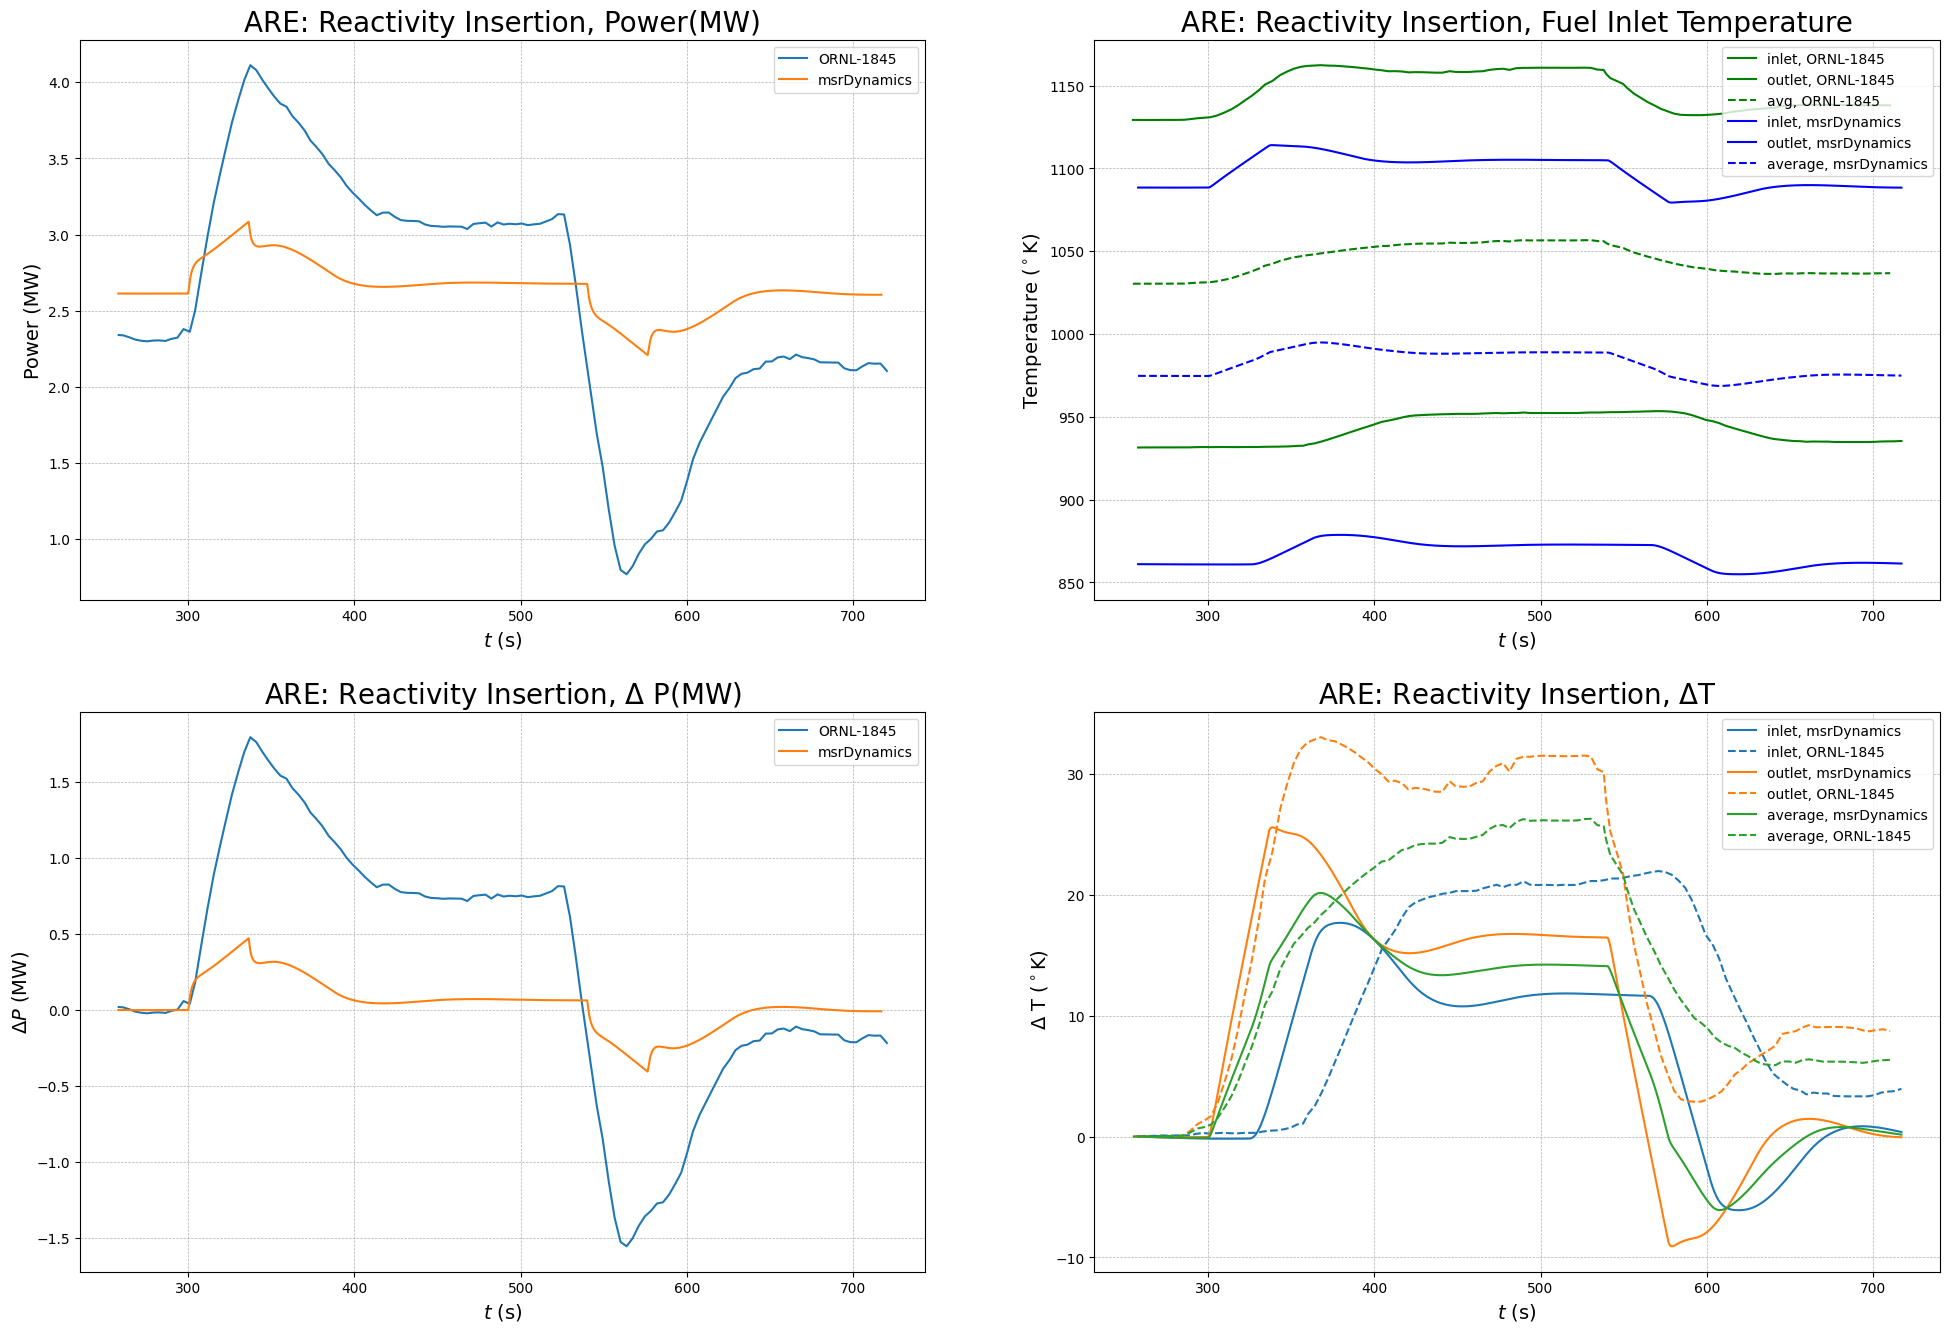

In [11]:
fig,axs = plt.subplots(2,2,figsize=(24,16))

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Function to update the style of each axis
def update_axis_style(ax, title = '', x_label='', y_label='', x_ticks=True, y_scale='linear'):
    ax.set_title(title,fontsize=20)
    ax.set_xlabel(x_label,fontsize=14)
    ax.set_ylabel(y_label,fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)
    ax.set_yscale(y_scale)

update_axis_style(axs[0,0],"ARE: Reactivity Insertion, Power(MW)")
axs[0,0].plot(df_power[0]*60-adj,df_power[1],label="ORNL-1845")
axs[0,0].plot(T_insert,[s*P for s in n.y_out[i_insert[0]:(i_insert[-1]+1)]],label="msrDynamics")
axs[0,0].set_xlabel(r"$t$ (s)")
axs[0,0].set_ylabel("Power (MW)")
axs[0,0].legend()

ornl_avg = (df_inlet[1]+df_outlet[1])/2
jitcdde_avg = (((np.array(hx_fh1_f2.y_out)+np.array(hx_fh1_f2.y_out))/2)+(np.array(c_f2.y_out)))/2
jit_inlet = (np.array(hx_fh1_f2.y_out)+np.array(hx_fh1_f2.y_out))/2

update_axis_style(axs[0,1],"ARE: Reactivity Insertion, Fuel Inlet Temperature")
axs[0,1].plot(df_inlet[0]*60-adj,df_inlet[1],label="inlet, ORNL-1845",color="green")
axs[0,1].plot(df_outlet[0]*60-adj,df_outlet[1],label="outlet, ORNL-1845",color="green")
axs[0,1].plot(df_outlet[0]*60-adj,ornl_avg,label="avg, ORNL-1845",color="green",linestyle="--")
axs[0,1].plot(T_insert,jit_inlet[i_insert[0]:(i_insert[-1]+1)],label="inlet, msrDynamics",color="blue")
axs[0,1].plot(T_insert,c_f2.y_out[i_insert[0]:(i_insert[-1]+1)],label="outlet, msrDynamics",color="blue")
axs[0,1].plot(T_insert,jitcdde_avg[i_insert[0]:(i_insert[-1]+1)],label="average, msrDynamics",color="blue",linestyle="--")
axs[0,1].set_xlabel(r"$t$ (s)")
axs[0,1].set_ylabel(r"Temperature ($^\circ$K)")
axs[0,1].legend()

# delta
update_axis_style(axs[1,0],r"ARE: Reactivity Insertion, $\Delta$ P(MW)")
axs[1,0].plot(df_power[0]*60-adj,df_power[1]-P,label="ORNL-1845")
axs[1,0].plot(T_insert,[P*(s-n.y_out[i_insert[0]-1]) for s in n.y_out[i_insert]],label="msrDynamics")
axs[1,0].set_xlabel(r"$t$ (s)")
axs[1,0].set_ylabel(r"$\Delta P$ (MW)")
axs[1,0].legend()

ornl_avg = (df_inlet[1]+df_outlet[1])/2
jitcdde_avg = (((np.array(hx_fh1_f2.y_out)+np.array(hx_fh1_f2.y_out))/2)+(np.array(c_f2.y_out)))/2
jit_inlet = (np.array(hx_fh1_f2.y_out)+np.array(hx_fh1_f2.y_out))/2

update_axis_style(axs[1,1],r"ARE: Reactivity Insertion, $\Delta$T")
axs[1,1].plot(T_insert,jit_inlet[i_insert]-jit_inlet[i_insert[0]-1],label="inlet, msrDynamics",color=colors[0])
axs[1,1].plot(df_inlet[0]*60-adj,df_inlet[1]-df_inlet[1][0],linestyle ="--",label="inlet, ORNL-1845 ",color=colors[0])
axs[1,1].plot(T_insert,c_f2.y_out[i_insert]-c_f2.y_out[i_insert[0]-1],label="outlet, msrDynamics",color=colors[1])
axs[1,1].plot(df_outlet[0]*60-adj,df_outlet[1]-df_outlet[1][0],linestyle="--",label="outlet, ORNL-1845 ",color=colors[1])
axs[1,1].plot(T_insert,jitcdde_avg[i_insert]-jitcdde_avg[i_insert[0]-1],label="average, msrDynamics",color=colors[2])
axs[1,1].plot(df_outlet[0]*60-adj,ornl_avg-ornl_avg[0],label="average, ORNL-1845",color=colors[2],linestyle="--")
axs[1,1].set_xlabel(r"$t$ (s)")
axs[1,1].set_ylabel(r" $\Delta$ T ($^\circ$K)")
axs[1,1].legend()